In [5]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import os
import statsmodels.tsa.stattools as st
from statsmodels.tsa.stattools import kpss
from statsmodels.tsa.stattools import adfuller

In [6]:
def adf_test(timeseries):
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
       dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput)
    
def kpss_test(timeseries):
    print ('Results of KPSS Test:')
    kpsstest = kpss(timeseries, regression='c', nlags="auto")
    kpss_output = pd.Series(kpsstest[0:3], index=['Test Statistic','p-value','Lags Used'])
    for key,value in kpsstest[3].items():
        kpss_output['Critical Value (%s)'%key] = value
    print (kpss_output)

In [7]:
df = pd.read_csv('./dados/Mock_dataset/MockDataset_train.csv')
df

,GroupKey,PrimaryKey,RelationKey,RelationType,Date,Value,DerivedFlag,DerivedLag,DerivedType
0,A1,A1,A,ROOT,2020-01-01,41.0,NaN,NaN,none
1,A1,A1,A,ROOT,2020-01-02,36.0,NaN,NaN,none
2,A1,A1,A,ROOT,2020-01-03,34.0,NaN,NaN,none
3,A1,A1,A,ROOT,2020-01-04,38.0,NaN,NaN,none
4,A1,A1,A,ROOT,2020-01-05,30.0,NaN,NaN,none
...,...,...,...,...,...,...,...,...,...
10145,G1,G29,G1,RELATED,2020-02-15,4.0,0.0,NaN,none
10146,G1,G29,G1,RELATED,2020-02-16,5.0,0.0,NaN,none
10147,G1,G29,G1,RELATED,2020-02-17,4.0,0.0,NaN,none
10148,G1,G29,G1,RELATED,2020-02-18,4.0,0.0,NaN,none


In [10]:
dfA1=df[df['PrimaryKey']=='A1'][['Date','Value']]
dfA2=df[df['PrimaryKey']=='A2'][['Date','Value']]
dfA4=df[df['PrimaryKey']=='A4'][['Date','Value']]

<AxesSubplot:>

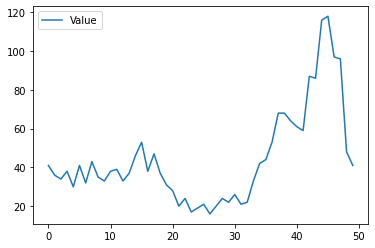

In [11]:
dfA1.plot()

In [13]:
adf_test(dfA1['Value'])

Results of Dickey-Fuller Test:
Test Statistic                 -3.305990
p-value                         0.014613
#Lags Used                     10.000000
Number of Observations Used    39.000000
Critical Value (1%)            -3.610400
Critical Value (5%)            -2.939109
Critical Value (10%)           -2.608063
dtype: float64


In [15]:
kpss_test(dfA1['Value']), kpss(dfA1['Value'], nlags=5)

Results of KPSS Test:
Test Statistic           0.480221
p-value                  0.046121
Lags Used                4.000000
Critical Value (10%)     0.347000
Critical Value (5%)      0.463000
Critical Value (2.5%)    0.574000
Critical Value (1%)      0.739000
dtype: float64


(None,
 (0.42249706884514376,
  0.06745815998054148,
  5,
  {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739}))

<AxesSubplot:>

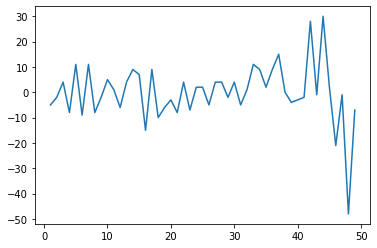

In [12]:
#DIFERENCING
dfA11=dfA1['Value']-dfA1['Value'].shift(1)
dfA11=dfA11.dropna()
dfA11.plot()

In [17]:
df3=pd.merge(dfA1,dfA2,how='outer',on='Date')

No handles with labels found to put in legend.
No handles with labels found to put in legend.


<Figure size 960000x480000 with 0 Axes>

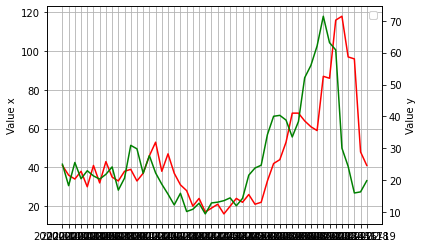

In [18]:
%matplotlib inline
from matplotlib.pyplot import figure
figure(num=None, figsize=(1200, 600), dpi=800)

fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(df3['Date'],df3['Value_x'], 'r')
ax2 = ax.twinx()
ax2.plot(df3['Date'],df3['Value_y'], 'g')
ax.set_ylabel("Value x")
ax2.set_ylabel("Value y")
ax.legend(loc=0)
ax2.legend(loc=0)
ax.grid()
plt.show()

In [19]:
df['Date'] = df['Date'].str.replace('-', '')

groups = pd.unique(df['GroupKey'])
rs = {}
for group in groups:
    gr = df[df['GroupKey']==group]
    pks = pd.unique(gr['PrimaryKey'])
    root = df[df['PrimaryKey']==group][['Date','Value']]

    res = {}
    num_lags = 10
    for key in pks:
        rel=df[df['PrimaryKey']==key][['Date', 'Value']]
        VAR=pd.merge(root,rel,how='outer',on='Date')

        gc = st.grangercausalitytests(VAR[['Value_x','Value_y']], maxlag=num_lags, verbose=False)

        max_ = 0
        max_lag = None
        for lag, item in gc.items():
            if item[0]['ssr_ftest'][0] > max_:
                max_ = item[0]['ssr_ftest'][0]
                max_lag = lag
        res[key] = (max_, max_lag)
    rs[group] = res
rs

{'A1': {'A1': (2.1087734097711596e-14, 1),
  'A2': (145.90778529628096, 3),
  'A3': (11.502276140448885, 8),
  'A4': (1.403284933704068, 7),
  'A5': (0.730363069601094, 9),
  'A6': (19.52325009024831, 1),
  'A7': (20.595740484673062, 1),
  'A8': (34.75991078393281, 1),
  'A9': (23.459054008963697, 1),
  'A10': (0.9452597084396256, 6),
  'A11': (6.067707024563833, 1),
  'A12': (4.786831932190039, 6),
  'A13': (1.4783379497856437, 10),
  'A14': (1.0058607366802337, 7),
  'A15': (1.119005920391705, 10),
  'A16': (0.8814256503013029, 1),
  'A17': (1.4864173527025348, 1),
  'A18': (1.2080822536008986, 6),
  'A19': (6.456885321514563, 1),
  'A20': (0.9520357378427233, 7),
  'A21': (1.234626490585538, 8),
  'A22': (0.8678894467148575, 4),
  'A23': (1.3063388426375526, 4),
  'A24': (0.8977031513671718, 10),
  'A25': (0.9888684267383665, 10),
  'A26': (5.354464671651531, 8),
  'A27': (1.82522783044788, 1),
  'A28': (1.6195160533148727, 8),
  'A29': (3.5557160988417658, 7)},
 'B1': {'B1': (1.216